In [ ]:
!gdown 1qgHOw_KqGU4qEEAIXAFDm-881RygbdXk

Downloading...
From: https://drive.google.com/uc?id=1qgHOw_KqGU4qEEAIXAFDm-881RygbdXk
To: /content/WA_Fn-UseC_-Telco-Customer-Churn.csv
100% 978k/978k [00:00<00:00, 19.0MB/s]


# Part 1 | Dataset Information

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# 1. Load the dataset
filename = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
try:
    df = pd.read_csv(filename)
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please upload the file or check the path.")

# 2. Display the first 5 rows to understand the structure
print("\nFirst 5 Rows of the Dataset ")
display(df.head())

# 3. Check data dimensions (Rows and Columns)
print(f"\n Data Dimensions\n Number of Samples (Rows): {df.shape[0]}\nNumber of Features (Columns): {df.shape[1]}")

# 4. General information about data types and non-null counts
print("\n Dataset Information ")
df.info()

# 5. Inspect the Target Variable (Churn) Distribution
print("\n Target Variable Distribution (Churn) ")
print(df['Churn'].value_counts())
print("\n Churn Percentage ")
print(df['Churn'].value_counts(normalize=True) * 100)

# 6. Check for duplicate rows
print(f"\n Number of Duplicate Rows: {df.duplicated().sum()} ")

# 7. List all features
print("\n Feature List ")
print(df.columns.tolist())

✅ Dataset loaded successfully.

First 5 Rows of the Dataset 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



 Data Dimensions
 Number of Samples (Rows): 7043
Number of Features (Columns): 21

 Dataset Information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-nul

# Part 2 | Data Pre-Processing

Missing values in 'TotalCharges' found: 11
Missing values in 'TotalCharges' handled (filled with 0).
'customerID' column dropped.
Target variable 'Churn' encoded to 0/1.


/tmp/ipython-input-514689831.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


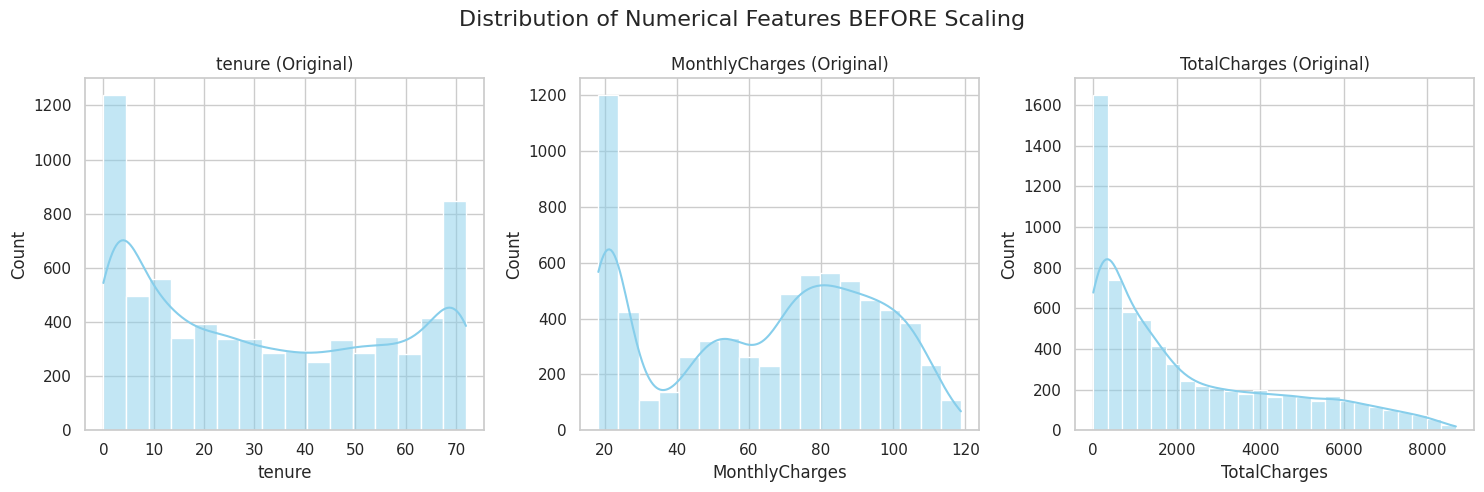

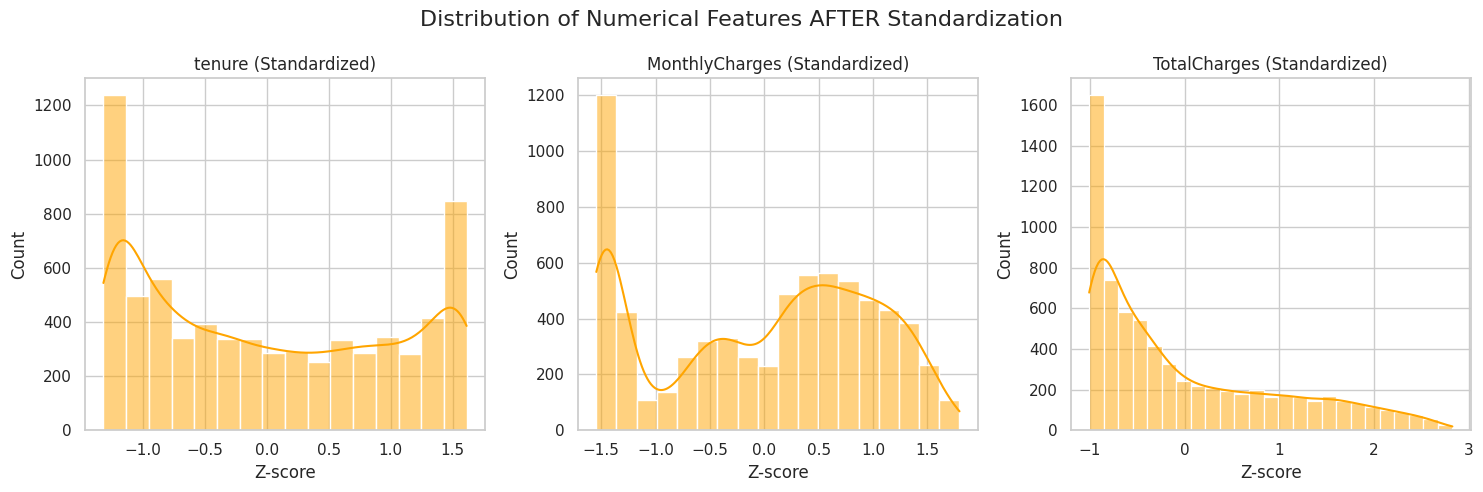


Impact Analysis of Scaling
Observe that the shape of the distribution remains similar, but the x-axis scale has changed.
Before: Ranges varied (e.g., tenure 0-72, MonthlyCharges 18-118).
After: All features are centered around 0 with a standard deviation of 1.

Final Data Structure
Shape of processed dataframe: (7043, 31)
First 3 rows of processed data:


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0.066327,-0.259629,-0.172165,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,-1.236724,-0.362660,-0.958066,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Handling 'TotalCharges' (Converting to numeric and handling missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values were created
missing_count = df['TotalCharges'].isnull().sum()
print(f"Missing values in 'TotalCharges' found: {missing_count}")

# Strategy: Fill missing values with 0 (since tenure is 0 for these rows) or drop.
df['TotalCharges'].fillna(0, inplace=True)
print("Missing values in 'TotalCharges' handled (filled with 0).")

# 2. Drop unnecessary columns
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("'customerID' column dropped.")

# 3. Target Encoding (Churn: Yes->1, No->0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Target variable 'Churn' encoded to 0/1.")

# 4. Feature Scaling Analysis (Before vs After)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot distributions BEFORE scaling
plt.figure(figsize=(15, 5))
plt.suptitle('Distribution of Numerical Features BEFORE Scaling', fontsize=16)
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} (Original)')
plt.tight_layout()
plt.show()

# Apply Standardization (Z-score normalization)
scaler = StandardScaler()
df_scaled_numeric = df.copy()
df_scaled_numeric[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Plot distributions AFTER scaling
plt.figure(figsize=(15, 5))
plt.suptitle('Distribution of Numerical Features AFTER Standardization', fontsize=16)
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_scaled_numeric[col], kde=True, color='orange')
    plt.title(f'{col} (Standardized)')
    plt.xlabel('Z-score')
plt.tight_layout()
plt.show()

print("\nImpact Analysis of Scaling")
print("Observe that the shape of the distribution remains similar, but the x-axis scale has changed.")
print("Before: Ranges varied (e.g., tenure 0-72, MonthlyCharges 18-118).")
print("After: All features are centered around 0 with a standard deviation of 1.")

# 5. Categorical Encoding (One-Hot Encoding)
# We apply this to the whole dataframe (excluding the numeric ones we just analyzed separately,
# but for the final pipeline we need to combine everything).

# Get categorical columns (excluding the target 'Churn' and numericals)
categorical_cols = [col for col in df.columns if col not in numerical_cols and col != 'Churn']

# Apply One-Hot Encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Also apply the scaling to the final dataframe for the numerical columns
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

print("\nFinal Data Structure")
print(f"Shape of processed dataframe: {df_processed.shape}")
print("First 3 rows of processed data:")
display(df_processed.head(3))

# Part 3 | Dimensionality Reduction

In [ ]:
print("NaN in y (Churn):", df_processed['Churn'].isna().sum())

df_processed = df_processed.dropna(subset=['Churn'])

df_processed['Churn'] = df_processed['Churn'].astype(int)

X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print("NaN in y after cleaning:", y.isna().sum())


NaN in y (Churn): 0
NaN in y after cleaning: 0


In [ ]:
import time
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

print("NaN in Churn before cleaning:", df_processed['Churn'].isna().sum())

df_processed = df_processed.dropna(subset=['Churn'])

df_processed['Churn'] = df_processed['Churn'].astype(int)

print("NaN in Churn after cleaning:", df_processed['Churn'].isna().sum())

X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print("Any NaN in X:", X.isna().sum().sum())
print("Any NaN in y:", y.isna().sum())

# Split data (Stratified to maintain class balance)
# We use random_state=93 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=93,
    stratify=y
)

# Initialize the classifier (using Logistic Regression for benchmarking speed)
clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=93
)

print(f"{'Method':<15} | {'Dimensions':<10} | {'Training Time (s)':<18} | {'Accuracy':<10} | {'F1-Score':<10}")
print("-" * 75)

# --- Scenario 1: Original Data (Baseline) ---
start_time = time.time()
clf.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{'Original':<15} | {X_train.shape[1]:<10} | {train_time:.5f}           | {acc:.4f}     | {f1:.4f}")

# --- Scenario 2: PCA (Unsupervised) ---
# Keep 95% of variance
pca = PCA(n_components=0.95, random_state=93)

start_time = time.time()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf.fit(X_train_pca, y_train)
train_time = time.time() - start_time

y_pred_pca = clf.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

print(f"{'PCA (95% Var)':<15} | {X_train_pca.shape[1]:<10} | {train_time:.5f}           | {acc_pca:.4f}     | {f1_pca:.4f}")

# --- Scenario 3: LDA (Supervised) ---
lda = LDA(n_components=1)

start_time = time.time()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

clf.fit(X_train_lda, y_train)
train_time = time.time() - start_time

y_pred_lda = clf.predict(X_test_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

print(f"{'LDA (1 Comp)':<15} | {X_train_lda.shape[1]:<10} | {train_time:.5f}           | {acc_lda:.4f}     | {f1_lda:.4f}")

print("-" * 75)


NaN in Churn before cleaning: 0
NaN in Churn after cleaning: 0
Any NaN in X: 0
Any NaN in y: 0
Method          | Dimensions | Training Time (s)  | Accuracy   | F1-Score  
---------------------------------------------------------------------------
Original        | 30         | 0.22452           | 0.7524     | 0.6361
PCA (95% Var)   | 17         | 0.09911           | 0.7524     | 0.6311
LDA (1 Comp)    | 1          | 0.12854           | 0.7626     | 0.6314
---------------------------------------------------------------------------


#**Part 4 | Model Training**

## SVM

Starting SVM Training & Evaluation

 Training on Original (30 Features)
 Training on PCA (17 Features)


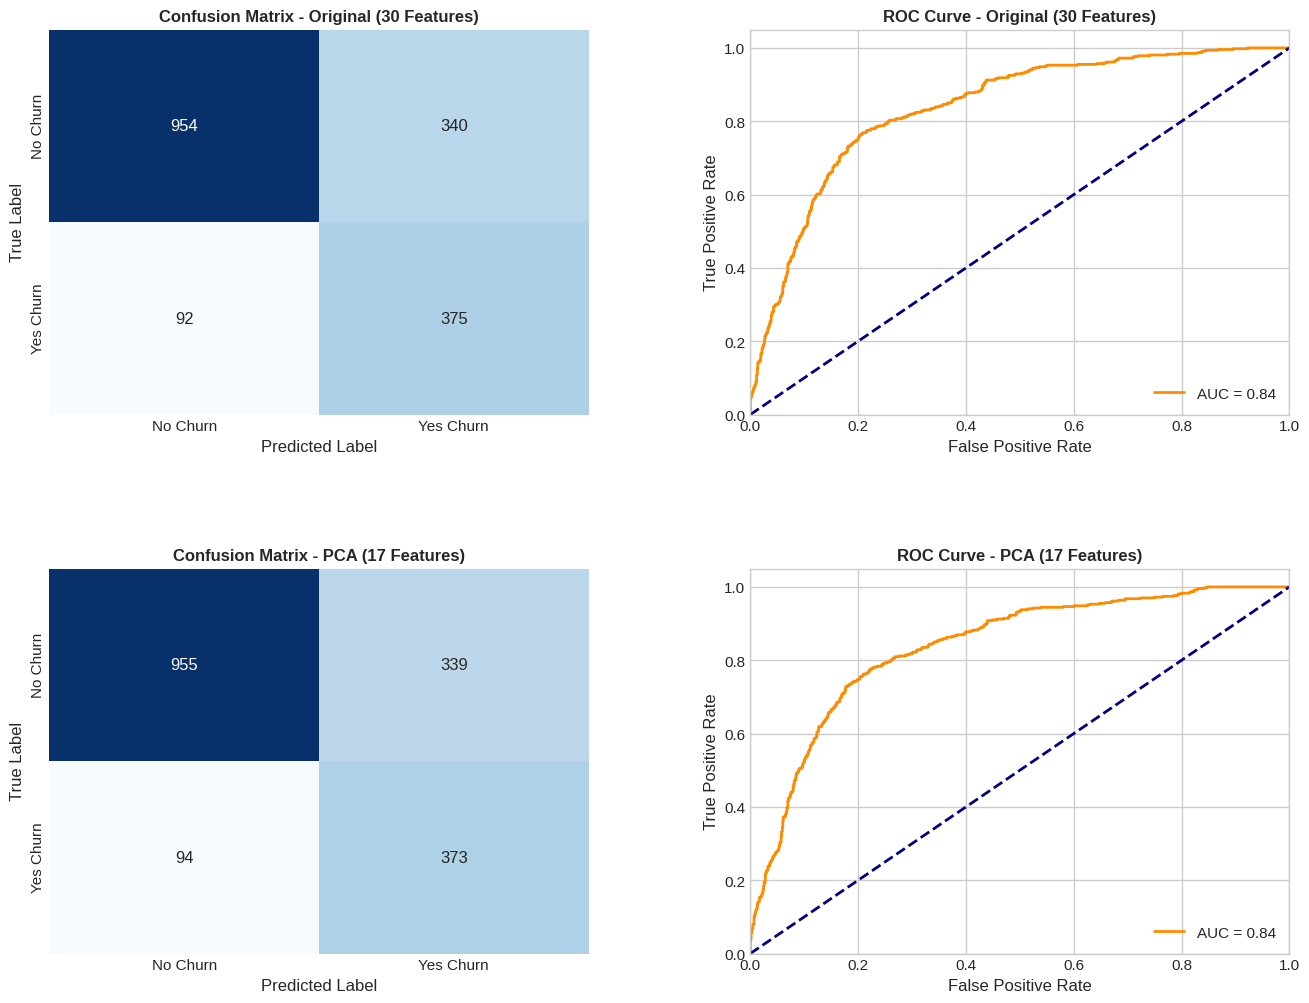


SVM PERFORMANCE SUMMARY


,Dataset,Accuracy,Precision,Recall,F1-Score,Hinge Loss
0,Original (30 Features),0.754685,0.524476,0.802998,0.634518,0.525404
1,PCA (17 Features),0.754117,0.523876,0.798715,0.632740,0.527011


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, hinge_loss, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay)


plt.style.use('seaborn-v0_8-whitegrid')


datasets = {
    "Original (30 Features)": (X_train, X_test),
    "PCA (17 Features)": (X_train_pca, X_test_pca)
}

results_list = []

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


print("Starting SVM Training & Evaluation\n")


svm_clf = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=93)


for i, (name, (X_tr, X_te)) in enumerate(datasets.items()):
    print(f" Training on {name}")

    svm_clf.fit(X_tr, y_train)


    y_pred = svm_clf.predict(X_te)
    y_score = svm_clf.decision_function(X_te)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    y_test_hinge = np.where(y_test == 0, -1, 1)
    loss = hinge_loss(y_test_hinge, y_score)

    results_list.append({
        "Dataset": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Hinge Loss": loss
    })

    ax_cm = axes[i, 0]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax_cm, cbar=False)
    ax_cm.set_title(f'Confusion Matrix - {name}', fontsize=12, fontweight='bold')
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')
    ax_cm.set_xticklabels(['No Churn', 'Yes Churn'])
    ax_cm.set_yticklabels(['No Churn', 'Yes Churn'])

    ax_roc = axes[i, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    ax_roc.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve - {name}', fontsize=12, fontweight='bold')
    ax_roc.legend(loc="lower right")


plt.show()


print("\n" + "="*80)
print("SVM PERFORMANCE SUMMARY")
print("="*80)
results_df = pd.DataFrame(results_list)
display(results_df)



 Calculating Learning Curve for 'Original Data' (Standard Model Behavior)


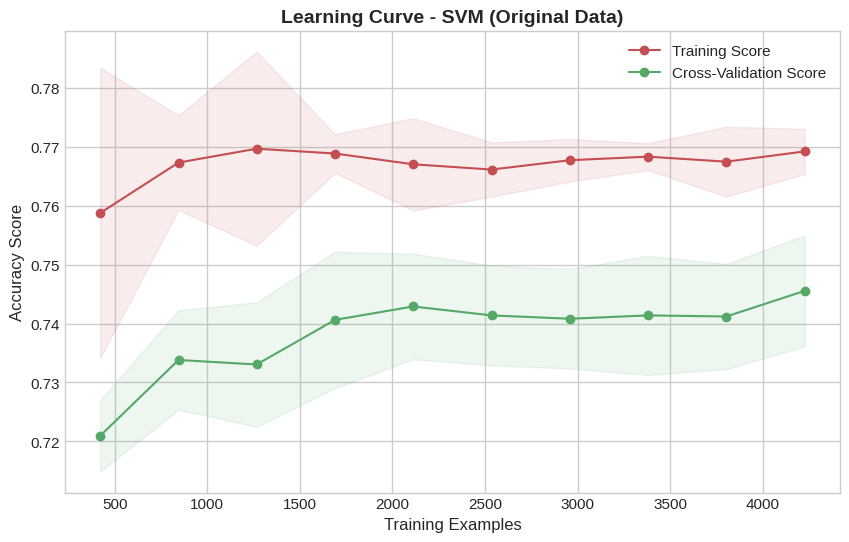

In [ ]:
print("\n Calculating Learning Curve for 'Original Data' (Standard Model Behavior)")
train_sizes, train_scores, test_scores = learning_curve(
    svm_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.title("Learning Curve - SVM (Original Data)", fontsize=14, fontweight='bold')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Random Forest

Starting Random Forest Training & Evaluation

Training on Original (30 Features)...
Training on PCA (17 Features)...


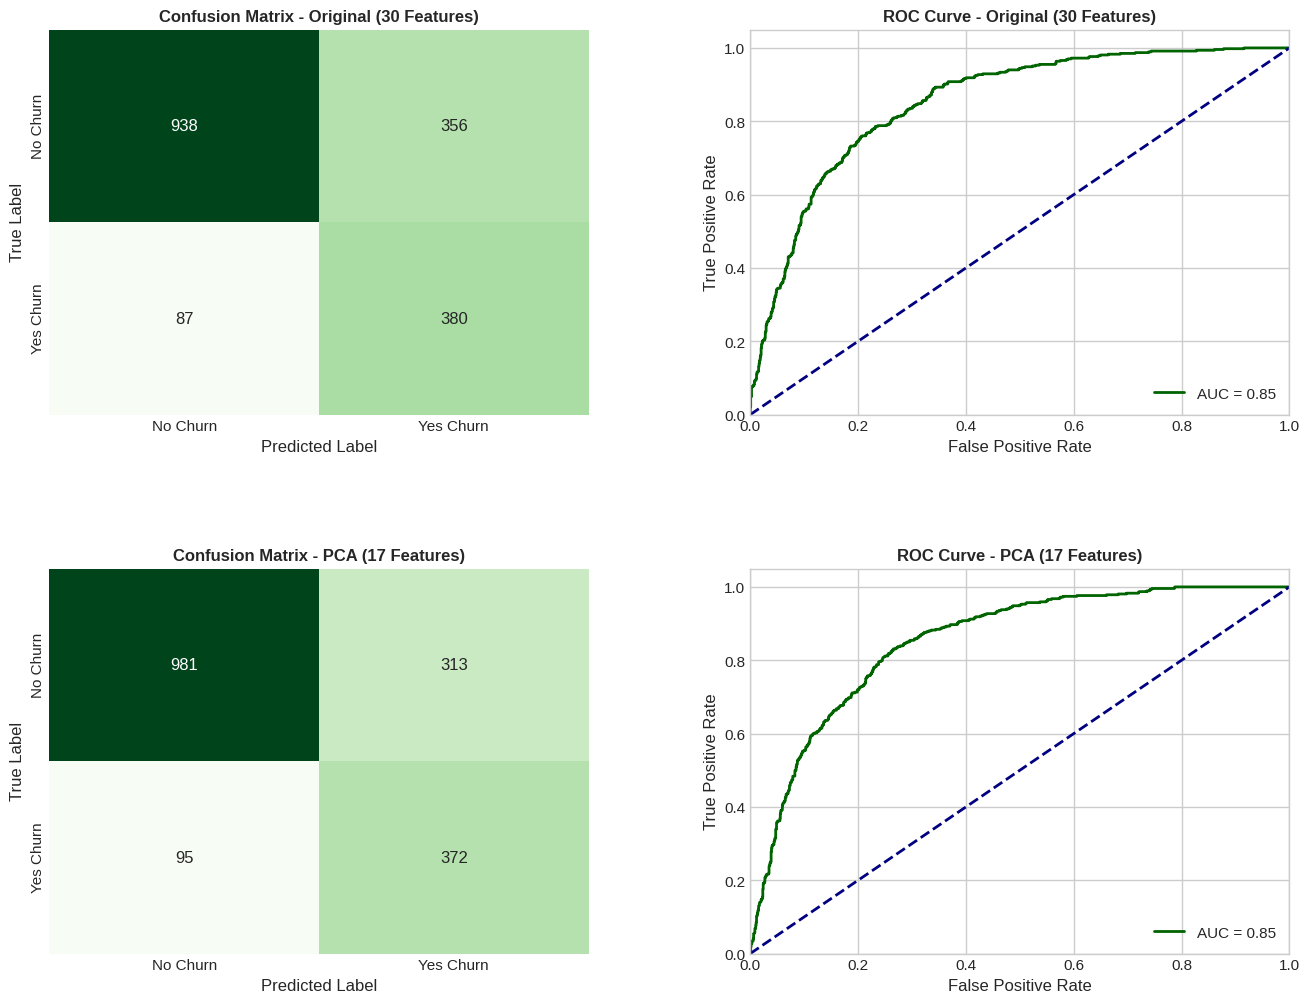


RANDOM FOREST PERFORMANCE SUMMARY


,Dataset,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Original (30 Features),0.748438,0.516304,0.813704,0.631754,0.498624
1,PCA (17 Features),0.768313,0.543066,0.796574,0.645833,0.493243



Calculating Learning Curve for 'Original Data'...


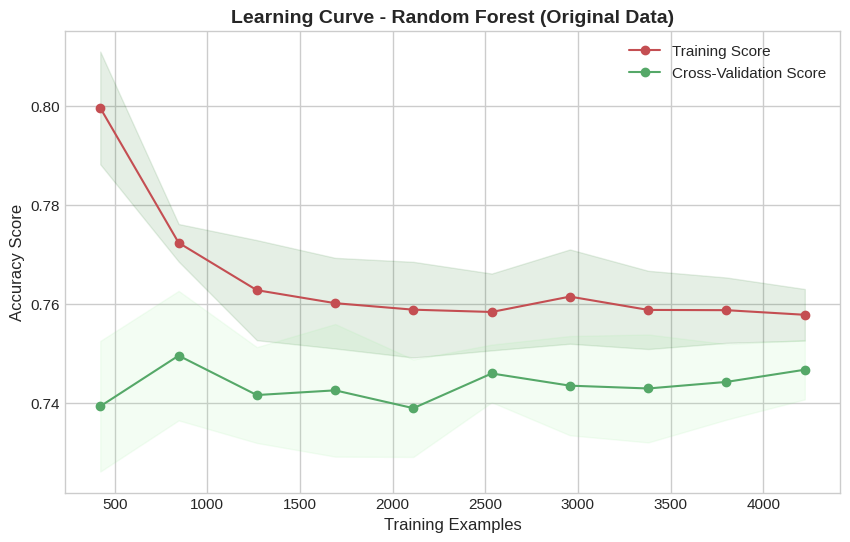

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, log_loss, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay)

plt.style.use('seaborn-v0_8-whitegrid')


datasets = {
    "Original (30 Features)": (X_train, X_test),
    "PCA (17 Features)": (X_train_pca, X_test_pca)
}

results_list_rf = []

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

print("Starting Random Forest Training & Evaluation\n")

rf_clf = RandomForestClassifier(n_estimators=250, max_depth=5,
                                criterion='entropy', class_weight='balanced',
                                random_state=93, n_jobs=-1)

for i, (name, (X_tr, X_te)) in enumerate(datasets.items()):
    print(f"Training on {name}...")

    rf_clf.fit(X_tr, y_train)


    y_pred = rf_clf.predict(X_te)
    y_proba = rf_clf.predict_proba(X_te)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    loss = log_loss(y_test, y_proba)


    results_list_rf.append({
        "Dataset": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Log Loss": loss
    })


    ax_cm = axes[i, 0]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax_cm, cbar=False)
    ax_cm.set_title(f'Confusion Matrix - {name}', fontsize=12, fontweight='bold')
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')
    ax_cm.set_xticklabels(['No Churn', 'Yes Churn'])
    ax_cm.set_yticklabels(['No Churn', 'Yes Churn'])

    ax_roc = axes[i, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    ax_roc.plot(fpr, tpr, color='darkgreen', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve - {name}', fontsize=12, fontweight='bold')
    ax_roc.legend(loc="lower right")

plt.show()


print("\n" + "="*80)
print("RANDOM FOREST PERFORMANCE SUMMARY")
print("="*80)
results_df_rf = pd.DataFrame(results_list_rf)
display(results_df_rf)

print("\nCalculating Learning Curve for 'Original Data'...")
train_sizes, train_scores, test_scores = learning_curve(
    rf_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="darkgreen")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="lightgreen")
plt.title("Learning Curve - Random Forest (Original Data)", fontsize=14, fontweight='bold')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## XG Boost

Calculated scale_pos_weight: 2.7675

Starting XGBoost Training & Evaluation

Training on Original (30 Features)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:43:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training on PCA (17 Features)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:43:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


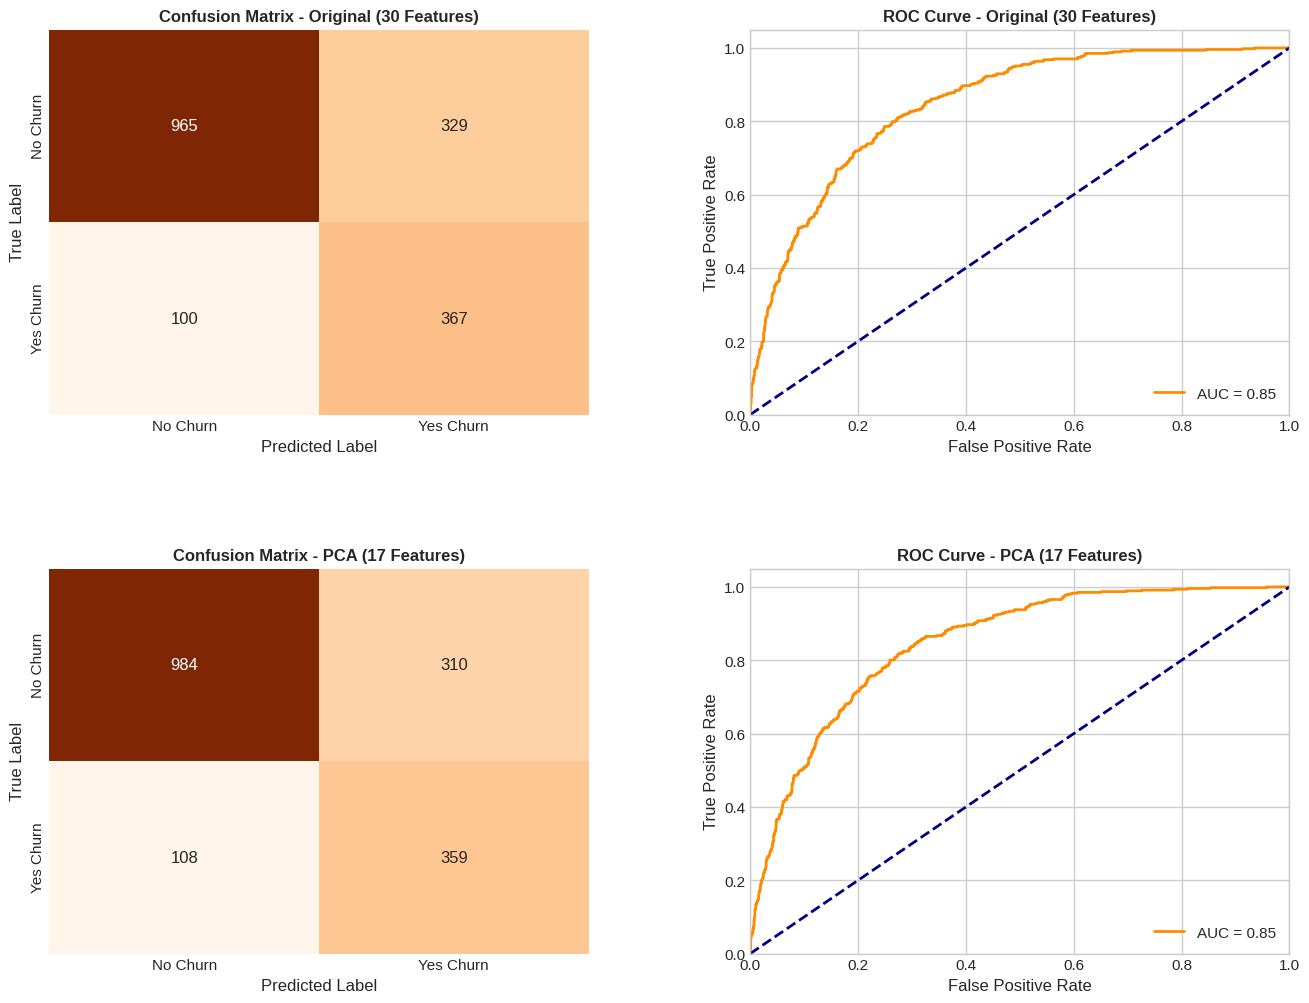


📊 XGBOOST PERFORMANCE SUMMARY


,Dataset,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Original (30 Features),0.756388,0.527299,0.785867,0.631126,0.473800
1,PCA (17 Features),0.762635,0.536622,0.768737,0.632042,0.467879



📈 Calculating Learning Curve for 'Original Data'...


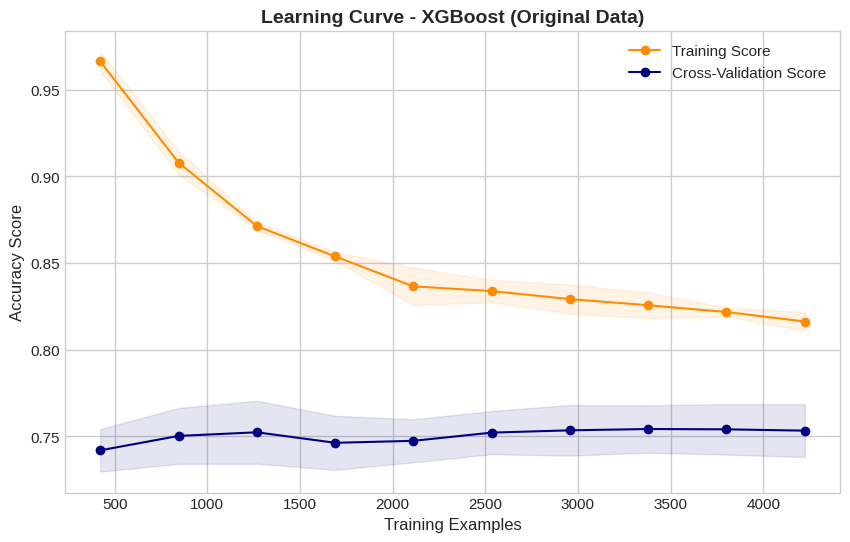

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, log_loss, confusion_matrix,
                             roc_curve, auc)


plt.style.use('seaborn-v0_8-whitegrid')

neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight_val = neg_count / pos_count
print(f"Calculated scale_pos_weight: {scale_pos_weight_val:.4f}\n")

results_list_xgb = []

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

print("Starting XGBoost Training & Evaluation\n")

xgb_clf = XGBClassifier(
    n_estimators=140,
    learning_rate=0.1,
    max_depth=4,
    scale_pos_weight=scale_pos_weight_val,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=93,
    n_jobs=-1
)

for i, (name, (X_tr, X_te)) in enumerate(datasets.items()):
    print(f"Training on {name}...")


    xgb_clf.fit(X_tr, y_train)

    y_pred = xgb_clf.predict(X_te)
    y_proba = xgb_clf.predict_proba(X_te)[:, 1]


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    loss = log_loss(y_test, y_proba)


    results_list_xgb.append({
        "Dataset": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Log Loss": loss
    })


    ax_cm = axes[i, 0]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=ax_cm, cbar=False)
    ax_cm.set_title(f'Confusion Matrix - {name}', fontsize=12, fontweight='bold')
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')
    ax_cm.set_xticklabels(['No Churn', 'Yes Churn'])
    ax_cm.set_yticklabels(['No Churn', 'Yes Churn'])

    ax_roc = axes[i, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    ax_roc.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve - {name}', fontsize=12, fontweight='bold')
    ax_roc.legend(loc="lower right")

plt.show()

print("\n" + "="*80)
print("📊 XGBOOST PERFORMANCE SUMMARY")
print("="*80)
results_df_xgb = pd.DataFrame(results_list_xgb)
display(results_df_xgb)

print("\n📈 Calculating Learning Curve for 'Original Data'...")
train_sizes, train_scores, test_scores = learning_curve(
    xgb_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="darkorange", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="navy", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="darkorange")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="navy")
plt.title("Learning Curve - XGBoost (Original Data)", fontsize=14, fontweight='bold')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## LightGBM

Calculated scale_pos_weight: 2.7675

Starting LightGBM Training & Evaluation

Training on Original (30 Features)...
Training on PCA (17 Features)...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


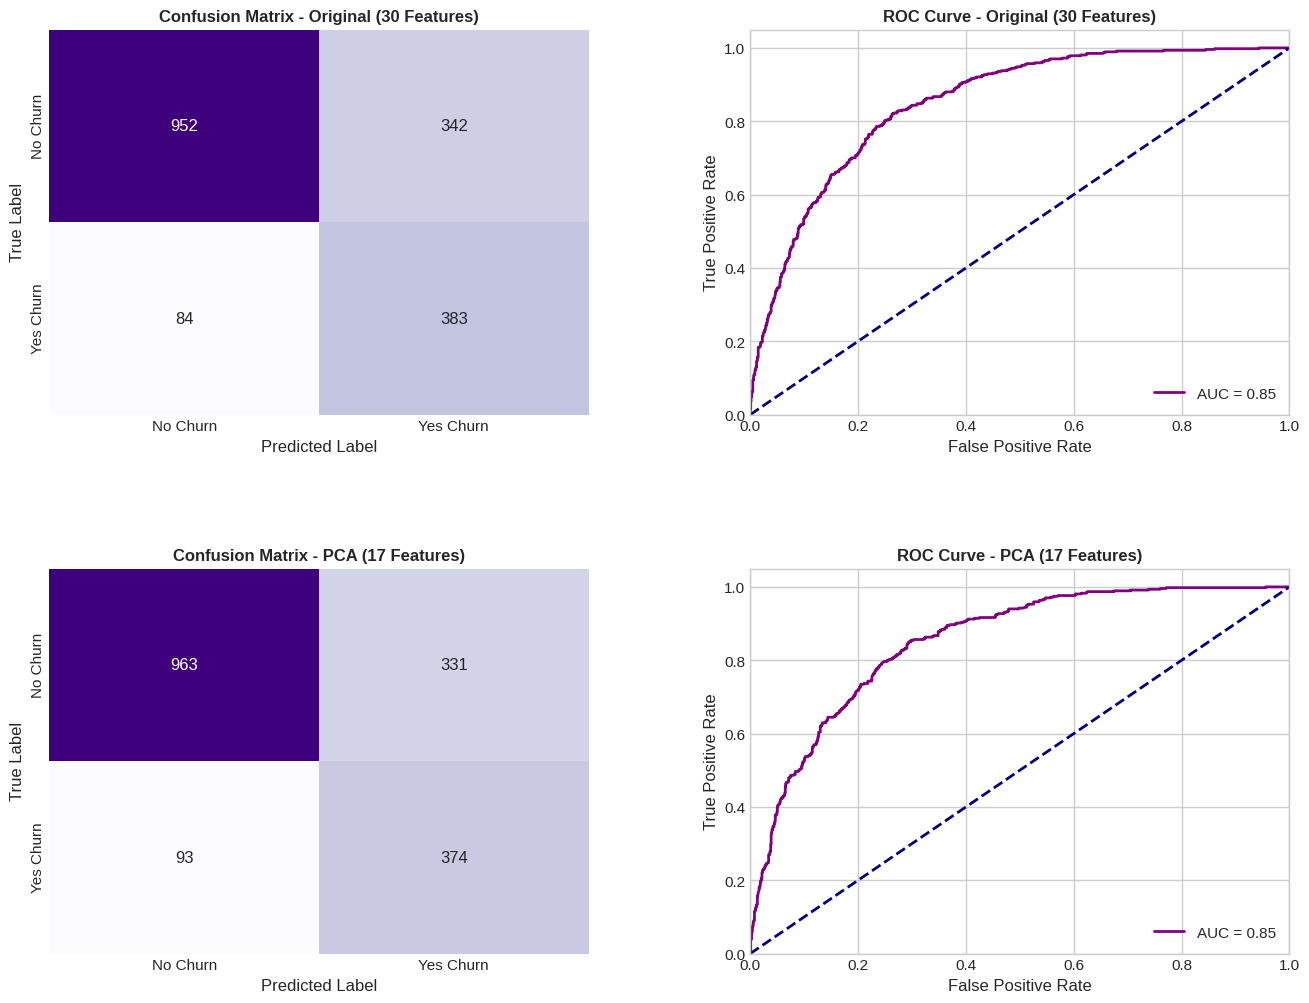


LIGHTGBM PERFORMANCE SUMMARY


,Dataset,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Original (30 Features),0.758092,0.528276,0.820128,0.642617,0.475417
1,PCA (17 Features),0.759228,0.530496,0.800857,0.638225,0.471557



Calculating Learning Curve for 'Original Data'...


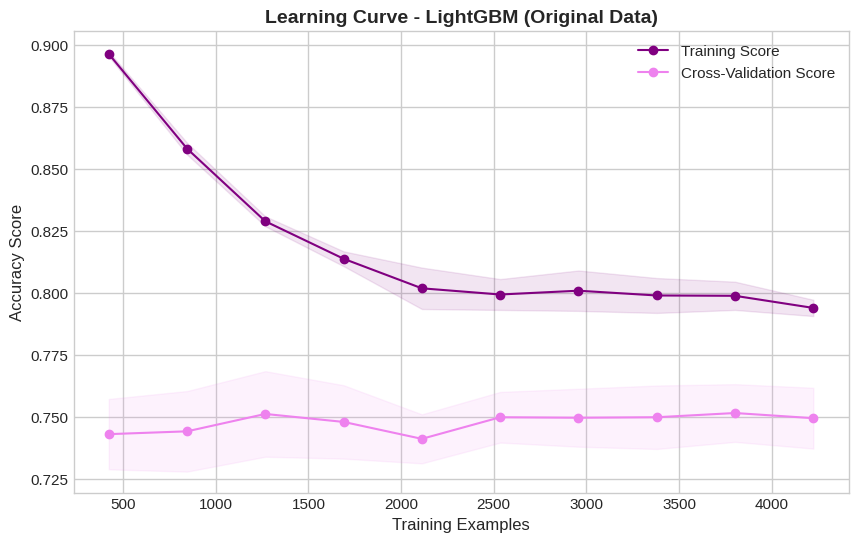

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, log_loss, confusion_matrix,
                             roc_curve, auc)

plt.style.use('seaborn-v0_8-whitegrid')


neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight_val = neg_count / pos_count
print(f"Calculated scale_pos_weight: {scale_pos_weight_val:.4f}\n")

results_list_lgb = []

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

print("Starting LightGBM Training & Evaluation\n")

lgb_clf = lgb.LGBMClassifier(
    n_estimators=170,
    learning_rate=0.05,
    max_depth=4,
    num_leaves=16,
    scale_pos_weight=scale_pos_weight_val,
    random_state=93,
    n_jobs=-1,
    verbose=-1
)

for i, (name, (X_tr, X_te)) in enumerate(datasets.items()):
    print(f"Training on {name}...")

    lgb_clf.fit(X_tr, y_train)

    y_pred = lgb_clf.predict(X_te)
    y_proba = lgb_clf.predict_proba(X_te)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    loss = log_loss(y_test, y_proba)

    results_list_lgb.append({
        "Dataset": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Log Loss": loss
    })

    ax_cm = axes[i, 0]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=ax_cm, cbar=False)
    ax_cm.set_title(f'Confusion Matrix - {name}', fontsize=12, fontweight='bold')
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')
    ax_cm.set_xticklabels(['No Churn', 'Yes Churn'])
    ax_cm.set_yticklabels(['No Churn', 'Yes Churn'])

    ax_roc = axes[i, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    ax_roc.plot(fpr, tpr, color='purple', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve - {name}', fontsize=12, fontweight='bold')
    ax_roc.legend(loc="lower right")

plt.show()

print("\n" + "="*80)
print("LIGHTGBM PERFORMANCE SUMMARY")
print("="*80)
results_df_lgb = pd.DataFrame(results_list_lgb)
display(results_df_lgb)

print("\nCalculating Learning Curve for 'Original Data'...")
train_sizes, train_scores, test_scores = learning_curve(
    lgb_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="purple", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="violet", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="purple")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="violet")
plt.title("Learning Curve - LightGBM (Original Data)", fontsize=14, fontweight='bold')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Decision Tree

Starting Decision Tree Training & Evaluation...

Training on Original (30 Features)...
Training on PCA (17 Features)...


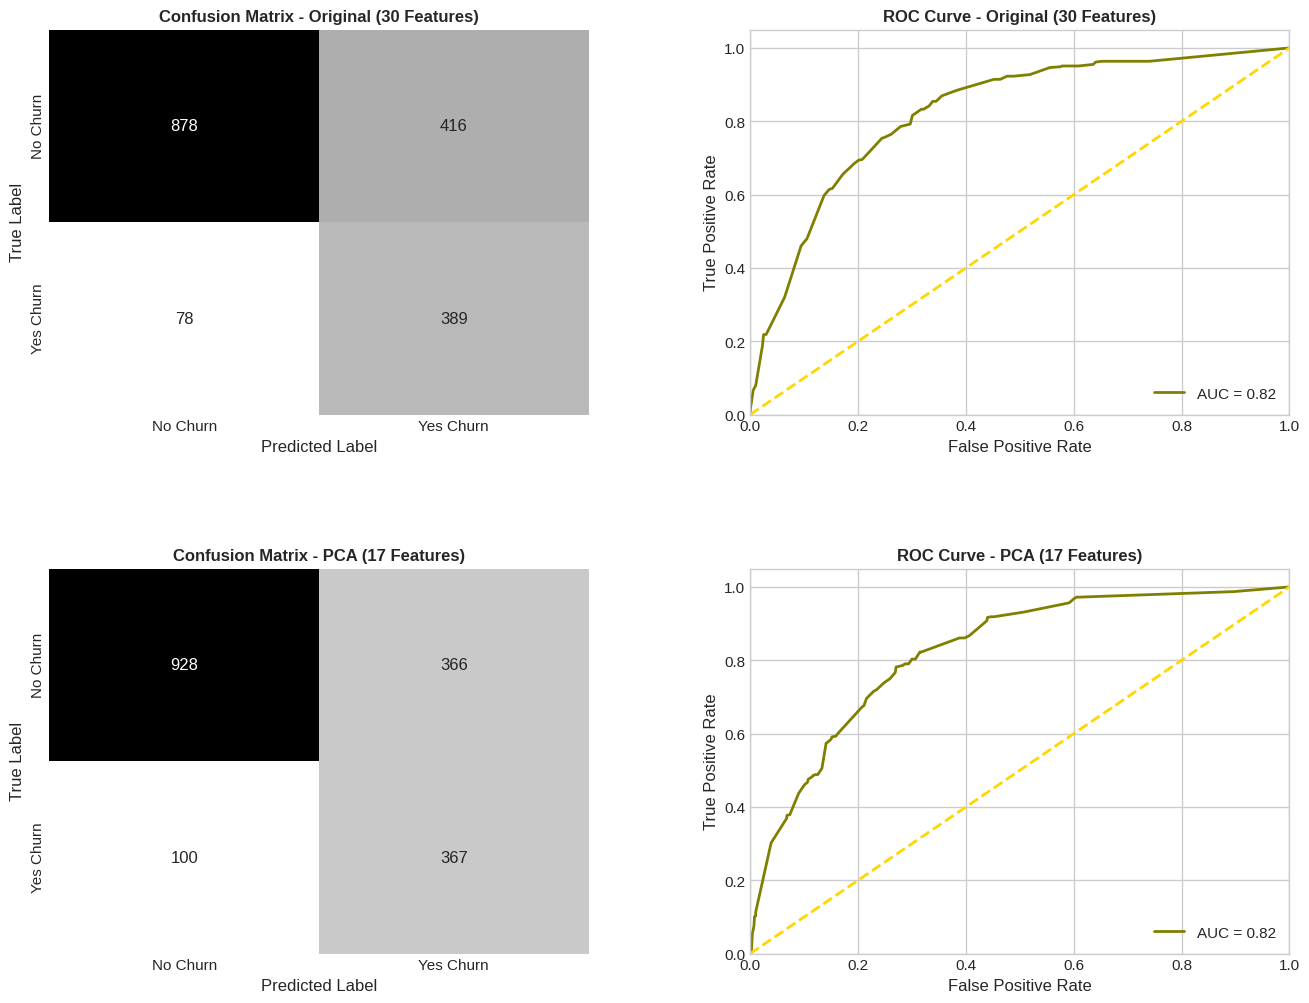


DECISION TREE PERFORMANCE SUMMARY


,Dataset,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Original (30 Features),0.719478,0.483230,0.832976,0.611635,0.828803
1,PCA (17 Features),0.735378,0.500682,0.785867,0.611667,0.675262



Calculating Learning Curve for 'Original Data'...


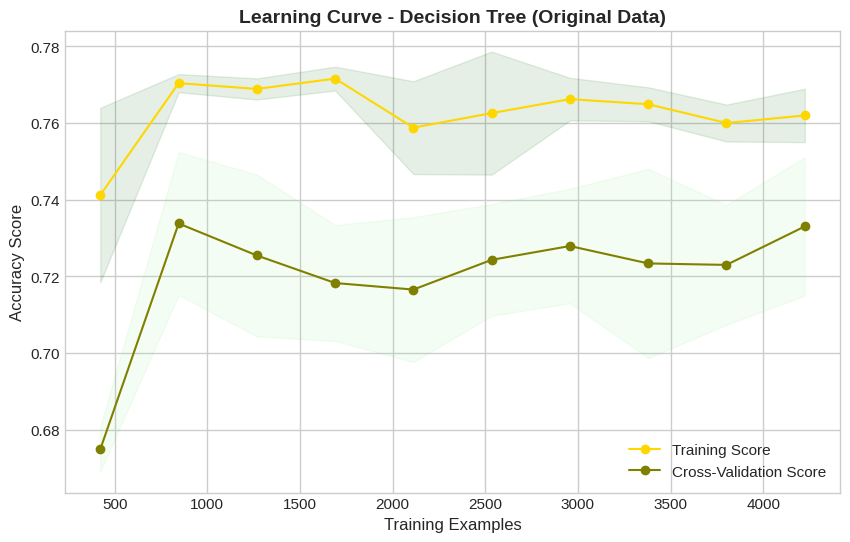

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, log_loss, confusion_matrix,
                             roc_curve, auc)

plt.style.use('seaborn-v0_8-whitegrid')

dt_clf = DecisionTreeClassifier(
    max_depth=7,
    min_samples_leaf=15,
    class_weight='balanced',
    random_state=93
)

results_list_dt = []

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

print("Starting Decision Tree Training & Evaluation...\n")

for i, (name, (X_tr, X_te)) in enumerate(datasets.items()):
    print(f"Training on {name}...")

    dt_clf.fit(X_tr, y_train)

    y_pred = dt_clf.predict(X_te)
    y_proba = dt_clf.predict_proba(X_te)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    loss = log_loss(y_test, y_proba)


    results_list_dt.append({
        "Dataset":   name,
        "Accuracy":  acc,
        "Precision": prec,
        "Recall":    rec,
        "F1-Score":  f1,
        "Log Loss":  loss
    })

    ax_cm = axes[i, 0]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', ax=ax_cm, cbar=False)
    ax_cm.set_title(f'Confusion Matrix - {name}', fontsize=12, fontweight='bold')
    ax_cm.set_xlabel('Predicted Label')
    ax_cm.set_ylabel('True Label')
    ax_cm.set_xticklabels(['No Churn', 'Yes Churn'])
    ax_cm.set_yticklabels(['No Churn', 'Yes Churn'])

    ax_roc = axes[i, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    ax_roc.plot(fpr, tpr, color='olive', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax_roc.plot([0, 1], [0, 1], color='gold', lw=2, linestyle='--')
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve - {name}', fontsize=12, fontweight='bold')
    ax_roc.legend(loc="lower right")

plt.show()


print("\n" + "="*80)
print("DECISION TREE PERFORMANCE SUMMARY")
print("="*80)
results_df_dt = pd.DataFrame(results_list_dt)
display(results_df_dt)


print("\nCalculating Learning Curve for 'Original Data'...")
train_sizes, train_scores, test_scores = learning_curve(
    dt_clf, X_train, y_train,
    cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="gold",  label="Training Score")
plt.plot(train_sizes, test_mean,  'o-', color="olive", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.1, color="darkgreen")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.1, color="lightgreen")
plt.title("Learning Curve - Decision Tree (Original Data)", fontsize=14, fontweight='bold')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


#**Part 5 | Models Comparison**

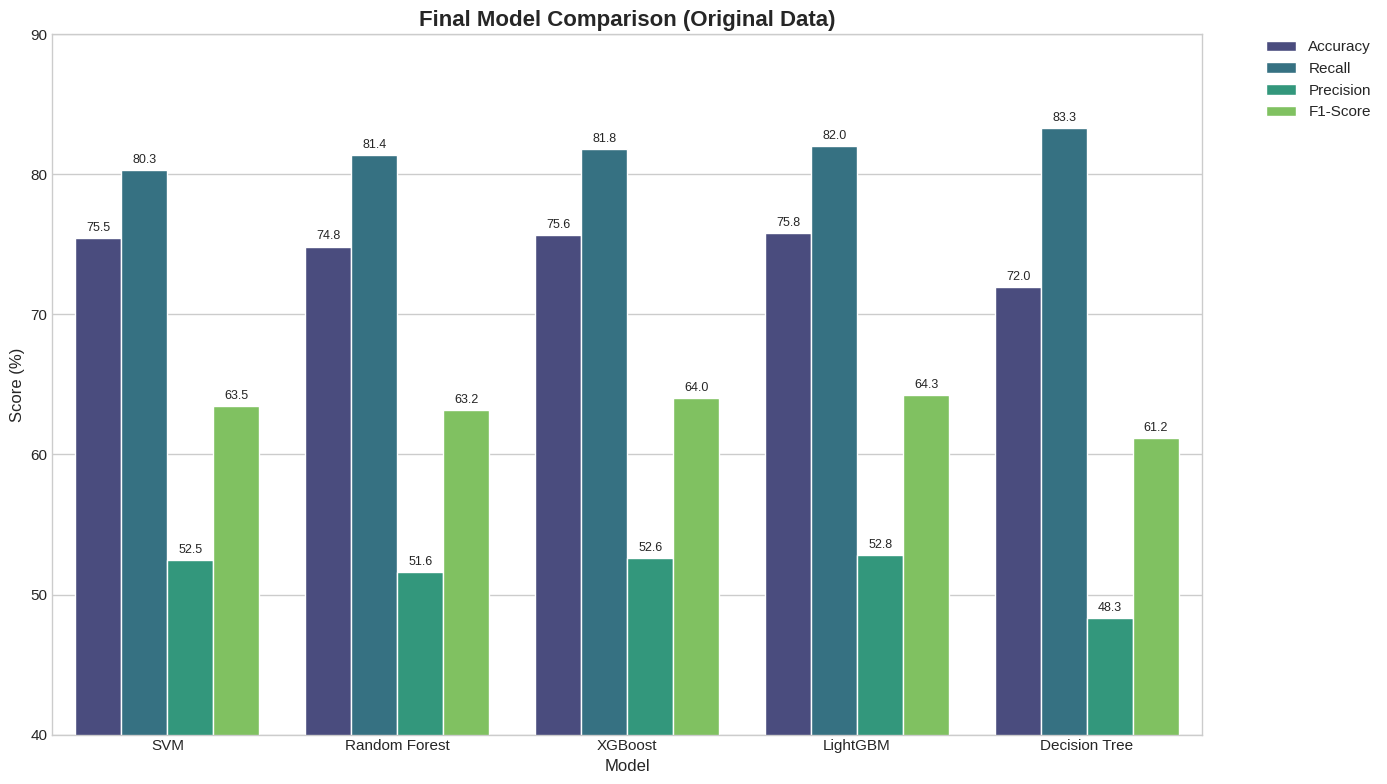


 Ranking Models by Recall (Churn Detection Power):


,Model,Accuracy,Recall,Precision,F1-Score
0,Decision Tree,71.95,83.30,48.32,61.16
1,LightGBM,75.81,82.01,52.83,64.26
2,XGBoost,75.64,81.80,52.62,64.04
3,Random Forest,74.84,81.37,51.63,63.17
4,SVM,75.47,80.30,52.45,63.45


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

model_performance = {
    'Model': ['SVM', 'Random Forest', 'XGBoost', 'LightGBM', 'Decision Tree'],
    'Accuracy': [75.47, 74.84, 75.64, 75.81, 71.95],
    'Recall': [80.30, 81.37, 81.80, 82.01, 83.30],
    'Precision': [52.45, 51.63, 52.62, 52.83, 48.32],
    'F1-Score': [63.45, 63.17, 64.04, 64.26, 61.16]
}

df_results = pd.DataFrame(model_performance)

plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

ax = sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted, palette="viridis")

plt.title('Final Model Comparison (Original Data)', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(40, 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

print("\n Ranking Models by Recall (Churn Detection Power):")
display(df_results.sort_values(by="Recall", ascending=False).reset_index(drop=True))

/tmp/ipython-input-2715227961.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Value", y="Feature", data=feature_imp.head(10), palette="viridis")


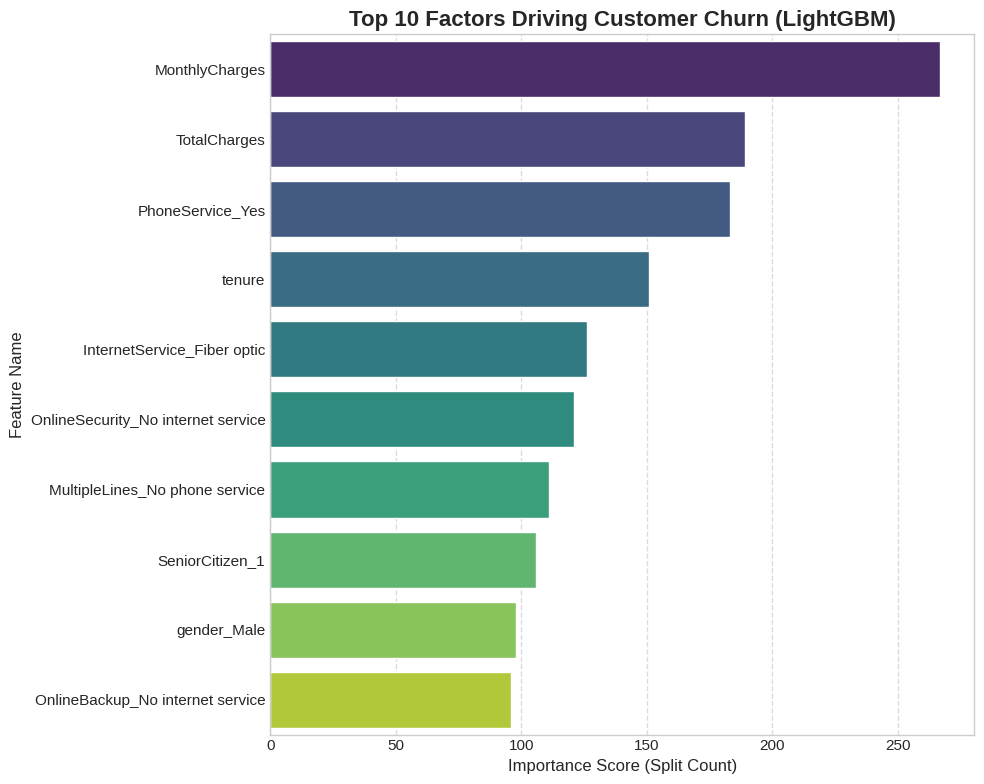


Top 10 Features Table:


,Value,Feature
0,267,MonthlyCharges
1,189,TotalCharges
2,183,PhoneService_Yes
3,151,tenure
4,126,InternetService_Fiber optic
5,121,OnlineSecurity_No internet service
6,111,MultipleLines_No phone service
7,106,SeniorCitizen_1
8,98,gender_Male
9,96,OnlineBackup_No internet service


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.DataFrame(sorted(zip(lgb_clf.feature_importances_, X_train.columns)), columns=['Value','Feature'])
feature_imp = feature_imp.sort_values(by="Value", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp.head(10), palette="viridis")

plt.title('Top 10 Factors Driving Customer Churn (LightGBM)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score (Split Count)', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nTop 10 Features Table:")
display(feature_imp.head(10).reset_index(drop=True))

#**Part 7 | Grid Search**

Starting Decision Tree Grid Search (Optimizing for RECALL)...
Fitting 3 folds for each of 54 candidates, totalling 162 fits

 Best Decision Tree Parameters:
{'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

📊 TUNED DECISION TREE PERFORMANCE


,Dataset,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Original (Tuned DT),0.71891,0.482801,0.841542,0.613583,0.560564


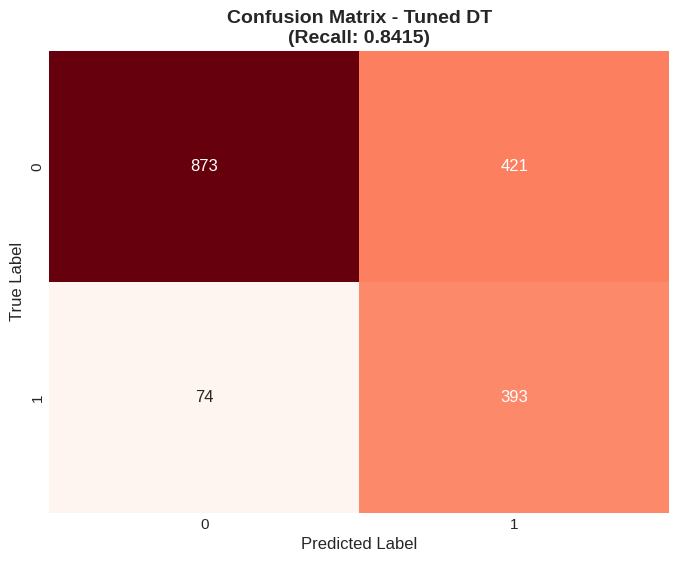

In [22]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:3}]
}

print("Starting Decision Tree Grid Search (Optimizing for RECALL)...")

dt_base = DecisionTreeClassifier(random_state=93)

grid_search_dt = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid_dt,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train, y_train)

print("\n Best Decision Tree Parameters:")
print(grid_search_dt.best_params_)

best_dt = grid_search_dt.best_estimator_
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

# گزارش
results_df_dt = pd.DataFrame([{
    "Dataset": "Original (Tuned DT)",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "Log Loss": log_loss(y_test, y_proba)
}])

print("\n" + "="*60)
print("📊 TUNED DECISION TREE PERFORMANCE")
print("="*60)
display(results_df_dt)

# ماتریس درهم‌ریختگی
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title(f'Confusion Matrix - Tuned DT\n(Recall: {results_df_dt["Recall"][0]:.4f})', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Starting SVM Grid Search (Optimizing for RECALL)... This may take a few minutes.
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best SVM Parameters:
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}

TUNED SVM PERFORMANCE


,Dataset,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Original (Tuned SVM),0.749006,0.517053,0.811563,0.631667,0.425283


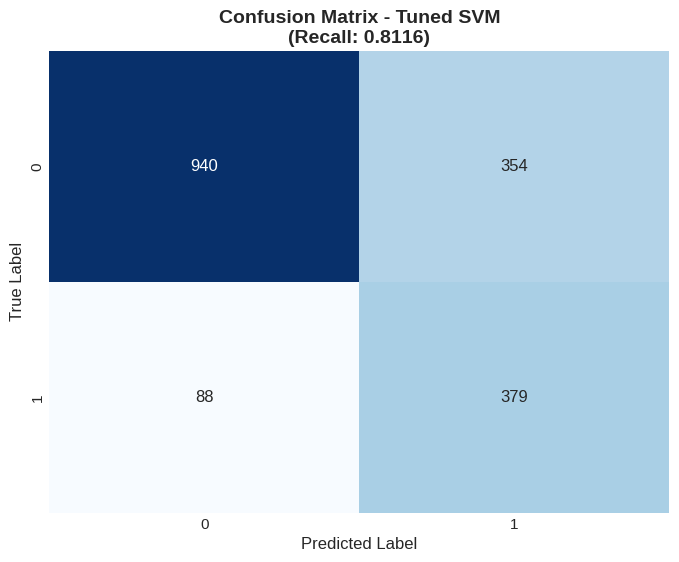

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, log_loss, confusion_matrix)

plt.style.use('seaborn-v0_8-whitegrid')

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1],
    'kernel': ['rbf'],
    'class_weight': ['balanced', {0:1, 1:1.5}, {0:1, 1:2}]
}

print("Starting SVM Grid Search (Optimizing for RECALL)... This may take a few minutes.")

svm_base = SVC(probability=True, random_state=93)

grid_search_svm = GridSearchCV(
    estimator=svm_base,
    param_grid=param_grid_svm,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_svm.fit(X_train, y_train)

# بهترین پارامترها
print("\nBest SVM Parameters:")
print(grid_search_svm.best_params_)

# پیش‌بینی
best_svm = grid_search_svm.best_estimator_
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:, 1]

# گزارش
results_df_svm = pd.DataFrame([{
    "Dataset": "Original (Tuned SVM)",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "Log Loss": log_loss(y_test, y_proba)
}])

print("\n" + "="*60)
print("TUNED SVM PERFORMANCE")
print("="*60)
display(results_df_svm)

# ماتریس درهم‌ریختگی
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Tuned SVM\n(Recall: {results_df_svm["Recall"][0]:.4f})', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Base scale_pos_weight: 2.7675

Starting LightGBM Randomized Search (Optimizing for RECALL)...
   Testing 50 random combinations across the parameter space.
Fitting 3 folds for each of 50 candidates, totalling 150 fits

✅ Best Parameters Found (Random Search):
{'learning_rate': 0.01, 'max_depth': 5, 'min_child_samples': 31, 'n_estimators': 216, 'num_leaves': 33, 'scale_pos_weight': 4.0}

RANDOM SEARCH LIGHTGBM PERFORMANCE


,Dataset,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Original (Random Search LGBM),0.732538,0.497525,0.860814,0.630588,0.512882


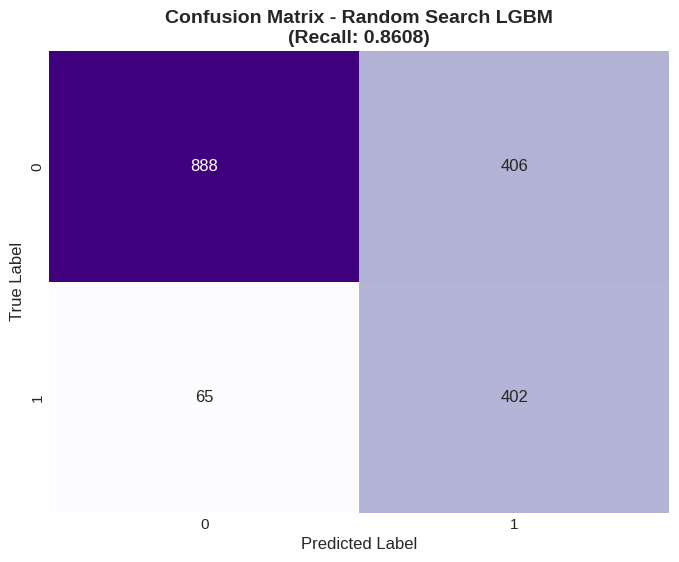

In [26]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight_val = neg_count / pos_count
print(f"Base scale_pos_weight: {scale_pos_weight_val:.4f}\n")

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 3, 5, 7, 10],
    'num_leaves': randint(20, 50),
    'min_child_samples': randint(10, 50),
    'scale_pos_weight': [scale_pos_weight_val, 3.0, 3.5, 4.0]
}

print("Starting LightGBM Randomized Search (Optimizing for RECALL)...")
print("   Testing 50 random combinations across the parameter space.")

lgb_base = lgb.LGBMClassifier(random_state=93, verbose=-1, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=lgb_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=93
)


random_search.fit(X_train, y_train)

print("\n✅ Best Parameters Found (Random Search):")
print(random_search.best_params_)

best_model_rand = random_search.best_estimator_
y_pred = best_model_rand.predict(X_test)
y_proba = best_model_rand.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_proba)

results_df_rand = pd.DataFrame([{
    "Dataset": "Original (Random Search LGBM)",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1-Score": f1,
    "Log Loss": loss
}])

print("\n" + "="*60)
print("RANDOM SEARCH LIGHTGBM PERFORMANCE")
print("="*60)
display(results_df_rand)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix - Random Search LGBM\n(Recall: {rec:.4f})', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Base scale_pos_weight: 2.7675

Starting Grid Search (Optimizing for RECALL)... This may take a minute.
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Best Parameters Found:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 10, 'scale_pos_weight': np.float64(3.0442225392296725)}

TUNED LIGHTGBM PERFORMANCE (Optimized for Recall)


,Dataset,Accuracy,Precision,Recall,F1-Score,Log Loss
0,Original (Tuned),0.746167,0.513021,0.843683,0.638057,0.493844


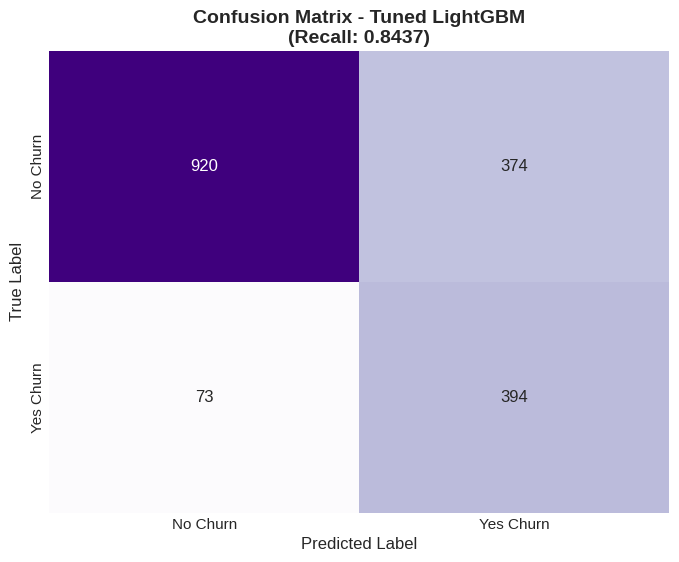

In [25]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

plt.style.use('seaborn-v0_8-whitegrid')

neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight_val = neg_count / pos_count
print(f"Base scale_pos_weight: {scale_pos_weight_val:.4f}\n")

param_grid = {
    'n_estimators': [50, 500],
    'learning_rate': [0.01, 1],
    'max_depth': [3, 7],
    'num_leaves': [10, 60],
    'scale_pos_weight': [scale_pos_weight_val, scale_pos_weight_val * 1.1]
}

print("Starting Grid Search (Optimizing for RECALL)... This may take a minute.")

lgb_base = lgb.LGBMClassifier(random_state=93, verbose=-1, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=lgb_base,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
loss = log_loss(y_test, y_proba)

results_df = pd.DataFrame([{
    "Dataset": "Original (Tuned)",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1-Score": f1,
    "Log Loss": loss
}])

print("\n" + "="*60)
print("TUNED LIGHTGBM PERFORMANCE (Optimized for Recall)")
print("="*60)
display(results_df)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title(f'Confusion Matrix - Tuned LightGBM\n(Recall: {rec:.4f})', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['No Churn', 'Yes Churn'])
plt.yticks([0.5, 1.5], ['No Churn', 'Yes Churn'])
plt.show()